# Imports 

# Conditions

| Model               | FiveVTS | Chickenpox | Pedalme | Wikimath | Windmillsmall | MontevideoBus |
|---------------------|---------|------------|---------|----------|---------------|---------------|
| Max iter.           | 30      | 30         | 30      | 30       | 30            | 30            |
| Epochs              | 50      | 50         | 50      | 50       | 50            | 50            |
| Lags                | 2       | 4          | 4       | 8        | 8             | 4             |
| Interpolation       | linear  | linear     | nearest | linear   | linear        | nearest       |
| Filters             |         |            |         |          |               |               |
| GConvGRU            | 12      | 16         | 12      | 12       | 12            | 12            |
| GConvLSTM           | 12      | 32         | 2       | 64       | 16            | 12            |
| GCLSTM              | 4       | 16         | 4       | 64       | 16            | 12            |
| LRGCN               | 4       | 8          | 8       | 32       | 12            | 2             |
| DyGrEncoder         | 12      | 12         | 12      | 12       | 12            | 12            |
| EvolveGCNH          | No need | No need    | No need | No need  | No need       | No need       |
| EvolveGCNO          | No need | No need    | No need | No need  | No need       | No need       |
| TGCN                | 12      | 12         | 12      | 12       | 12            | 8             |
| DCRNN               | 2       | 16         | 8       | 12       | 4             | 12            |


# Import

In [4]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import pickle

import plotly.io as pio

In [5]:
pd.options.plotting.backend = "plotly"
pio.templates.default = "plotly_white"

# Data

In [59]:
df_dataset = pd.DataFrame({
    'dataset':['fivenodes','chickenpox','pedalme','wikimath','windmillsmall','monte'],
    'node':[5,20,15,1068,11,675],
    'time':[200,522,36,731,17472,744]
})
df = pd.read_csv('./Body_Results.csv').iloc[:,1:].merge(df_dataset)

# 시각화1: MissingRate (본문)

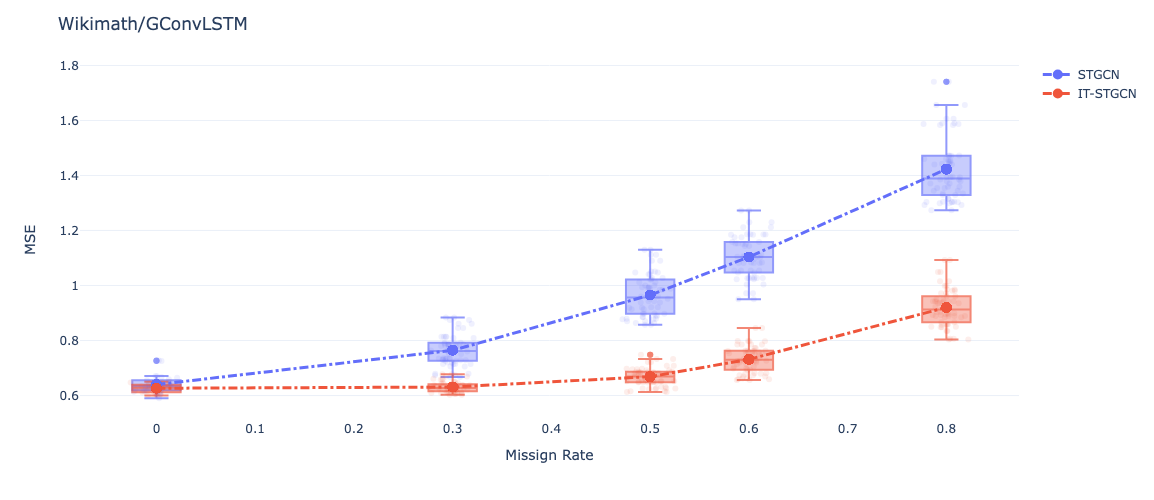

In [87]:
big = df.query("mtype=='rand' or mtype.isna()").query("dataset == 'wikimath'").query("model == 'GConvLSTM'")\
.sort_values(by='mrate')\
.assign(mrate_jittered = lambda df: np.array(df['mrate'])+np.random.randn(len(df['mrate']))*0.01)
small = big.groupby(["dataset","mrate","method"]).agg({'mse':'mean'}).reset_index().rename({'mse':'mse_mean'},axis=1)
tidydata = big.merge(small)
fig = px.scatter(
    tidydata,
    y='mse',
    x='mrate_jittered',
    opacity=0.1,
    color='method',
    width=750,
    height=500,
)
_fig1 = px.scatter(
    tidydata,
    y='mse_mean',
    x='mrate',
    color='method',
)
_fig1.data[0]['mode']='markers+lines'
_fig1.data[0]['marker']['size'] = 10
_fig1.data[0]['line']['width'] = 3
_fig1.data[0]['line']['dash'] = 'dashdot'
_fig1.data[1]['mode']='markers+lines'
_fig1.data[1]['marker']['size'] = 10
_fig1.data[1]['line']['width'] = 3
_fig1.data[1]['line']['dash'] = 'dashdot'
_fig2 = px.box(
    tidydata.query("method=='STGCN'"),
    y='mse',
    x='mrate',
)
_fig2.data[0]['opacity']=0.7
_fig2.data[0]['marker']['color']='#636efa'
_fig3 = px.box(
    tidydata.query("method=='IT-STGCN'"),
    y='mse',
    x='mrate',
)
_fig3.data[0]['opacity']=0.7
_fig3.data[0]['marker']['color']='#EF553B'
_fig3
for g in _fig1.data:
    fig.add_trace(g)
for g in _fig2.data:
    fig.add_trace(g)
for g in _fig3.data:
    fig.add_trace(g)
fig.data[0]['showlegend'] =False
fig.data[1]['showlegend'] =False
fig.layout['xaxis']['title']['text']='Missign Rate'
fig.layout['yaxis']['title']['text']='MSE'
fig.layout['legend']['title']['text']=""
fig.layout['title']['text']='Wikimath/GConvLSTM'
fig

# 시각화2: MissingRate (부록)

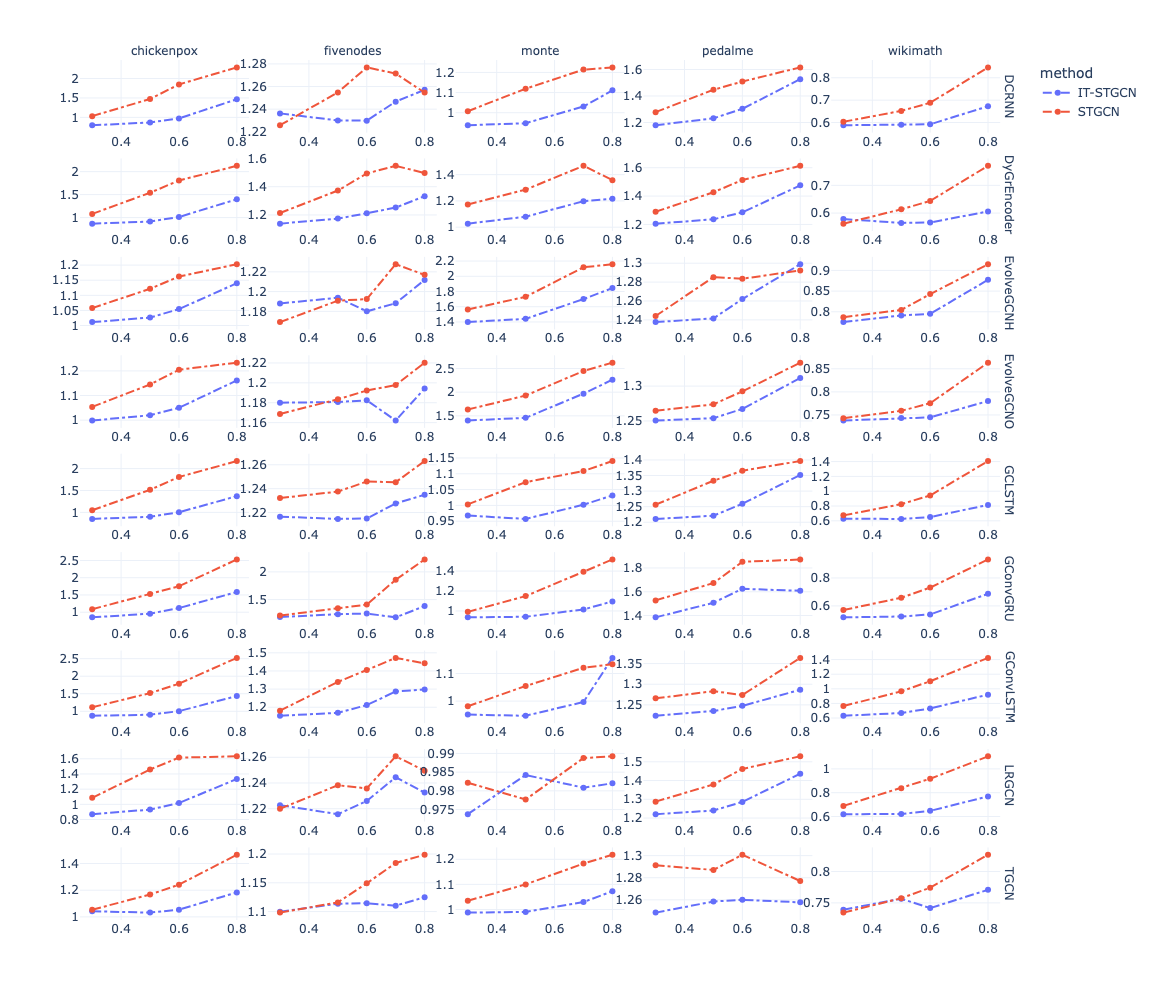

In [88]:
fig = df.query("mtype=='rand'")\
.query("method != 'GNAR'")\
.query("dataset != 'windmillsmall'")\
.groupby(["method","dataset","mrate","model"]).agg({'mse':'mean'}).reset_index()\
.plot.line(
    x='mrate',
    y='mse',
    color='method',
    facet_row='model',
    facet_col='dataset',
    width=750,
    height=1000,
    
)
for scatter in fig.data:
    scatter['mode'] = 'lines+markers'
    scatter['line']['dash'] = 'dashdot'
for annotation in fig.layout['annotations']:
    annotation['text'] = annotation['text'].replace('dataset=','')
    annotation['text'] = annotation['text'].replace('model=','')
for k in [k for k in fig.layout if 'xaxis' in k]:
    fig.layout[k]['title']['text'] = None 
for k in [k for k in fig.layout if 'yaxis' in k]:
    fig.layout[k]['title']['text'] = None 
fig.update_yaxes(showticklabels=True,matches=None)
fig.update_xaxes(showticklabels=True,matches=None)

# 시각화3

In [121]:
df.groupby(['dataset','mrate']).agg('count')

method  mtype  lags  nof_filters  inter_method  epoch  \
dataset       mrate                                                             
chickenpox    0.000000     540      0   540          540             0    540   
              0.287770     543    543   543          540           543    540   
              0.300000     543    543   543          540           543    540   
              0.500000     543    543   543          540           543    540   
              0.600000     543    543   543          540           543    540   
              0.800000     543    543   543          540           543    540   
fivenodes     0.000000    1080      0  1080         1080             0   1080   
              0.125000     543    543   543          540           543    540   
              0.300000     570    570   570          540           570    540   
              0.500000     570    570   570          540           570    540   
              0.600000     570    570   570          540           570    540   
              0.700000     543    543   543          540           543    540   
              0.800000     543    543   543          540           543    540   
monte         0.000000     663      0   663          660             0    660   
              0.149142    1353   1353  1353         1350          1353   1350   
              0.300000    1080   1080  1080         1080          1080   1080   
              0.500000    1080   1080  1080         1080          1080   1080   
              0.700000    1080   1080  1080         1080          1080   1080   
              0.800000    1443   1443  1443         1440          1443   1440   
pedalme       0.000000    1086      0  1086         1080             0   1080   
              0.285714     546    546   546          540           546    540   
              0.300000     546    546   546          540           546    540   
              0.500000     546    546   546          540           546    540   
              0.600000     546    546   546          540           546    540   
              0.800000     546    546   546          540           546    540   
wikimath      0.000000     543      0   543          540             0    540   
              0.003835     120    120   120          120           120    120   
              0.095870     120    120   120          120           120    120   
              0.119837    1083   1083  1083         1080          1083   1080   
              0.300000    1023   1023  1023         1020          1023   1020   
              0.500000    1080   1080  1080         1080          1080   1080   
              0.600000    1080   1080  1080         1080          1080   1080   
              0.800000    1083   1083  1083         1080          1083   1080   
windmillsmall 0.000000     544      0   544          544             0    544   
              0.081291    1088   1088  1088         1088          1088   1088   
              0.700000    1084   1084  1084         1084          1084   1084   

                         mse  calculation_time  model  node  time  
dataset       mrate                                                
chickenpox    0.000000   540               540    540   540   540  
              0.287770   543               543    543   543   543  
              0.300000   543               543    543   543   543  
              0.500000   543               543    543   543   543  
              0.600000   543               543    543   543   543  
              0.800000   543               543    543   543   543  
fivenodes     0.000000  1080              1080   1080  1080  1080  
              0.125000   543               543    543   543   543  
              0.300000   570               570    570   570   570  
              0.500000   570               570    570   570   570  
              0.600000   570               570    570   570   570  
              0.700000   543               543    543   543  

In [131]:
df.query('method != "GNAR" ')\
.query('mrate==0 or mrate==0.8')\
.query('dataset != "windmillsmall"')\
.groupby(['method','dataset','mrate','model','node','time']).agg({'mse':['mean','std']}).reset_index()\
.set_axis(['method','dataset','mrate','model','node','time','mse_mean','mse_std'],axis=1)\
.assign(node2 = lambda df: df['node']+np.random.randn(len(df))*df['mse_std'])\
.assign(time2 = lambda df: df['time']+np.random.randn(len(df))*df['mse_std'])

,method,dataset,mrate,model,node,time,mse_mean,mse_std,node2,time2
0,IT-STGCN,chickenpox,0.0,DCRNN,20,522,0.726294,0.006940,19.997561,522.001144
1,IT-STGCN,chickenpox,0.0,DyGrEncoder,20,522,0.910287,0.042160,20.048103,522.017468
2,IT-STGCN,chickenpox,0.0,EvolveGCNH,20,522,0.996133,0.018555,20.024209,522.040005
3,IT-STGCN,chickenpox,0.0,EvolveGCNO,20,522,0.983777,0.016232,20.007403,522.016374
4,IT-STGCN,chickenpox,0.0,GCLSTM,20,522,0.877675,0.047477,19.909272,521.971168
...,...,...,...,...,...,...,...,...,...,...
175,STGCN,wikimath,0.8,GCLSTM,1068,731,1.406770,0.115652,1067.917766,730.986298
176,STGCN,wikimath,0.8,GConvGRU,1068,731,0.932352,0.043019,1067.975256,731.033488
177,STGCN,wikimath,0.8,GConvLSTM,1068,731,1.423042,0.120256,1067.960493,730.981289
178,STGCN,wikimath,0.8,LRGCN,1068,731,1.105330,0.097762,1067.832008,730.924763


# 시각화 

In [70]:
df[df['dataset'] == 'fivenodes']

,dataset,method,mrate,mtype,lags,nof_filters,inter_method,epoch,mse,calculation_time,model,node,time
0,fivenodes,STGCN,0.0,NaN,2,12.0,NaN,50.0,0.729374,80.985221,GConvGRU,5,200
1,fivenodes,STGCN,0.0,NaN,2,12.0,NaN,50.0,0.729082,80.891788,GConvGRU,5,200
2,fivenodes,IT-STGCN,0.0,NaN,2,12.0,NaN,50.0,0.731600,114.492592,GConvGRU,5,200
3,fivenodes,IT-STGCN,0.0,NaN,2,12.0,NaN,50.0,0.735026,115.544274,GConvGRU,5,200
4,fivenodes,STGCN,0.0,NaN,2,12.0,NaN,50.0,0.727182,102.783140,GConvGRU,5,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4414,fivenodes,GNAR,0.5,rand,2,NaN,linear,NaN,1.406830,0.009497,GNAR,5,200
4415,fivenodes,GNAR,0.6,rand,2,NaN,linear,NaN,1.406830,0.012190,GNAR,5,200
4416,fivenodes,GNAR,0.3,rand,2,NaN,linear,NaN,1.406830,0.007664,GNAR,5,200
4417,fivenodes,GNAR,0.5,rand,2,NaN,linear,NaN,1.406830,0.010377,GNAR,5,200
